In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
adata = sq.datasets.visium_hne_adata()

In [3]:
# adata_resnet.obs["resnet_embedding_cluster"].to_csv("/storage/groups/ml01/code/giovanni.palla/squidpy_reproducibility/notebooks/supp_figures/resnet_embedding.csv.gz")
obs_resnet = pd.read_csv("./resnet_embedding.csv.gz", index_col=0)

In [4]:
adata.obs["resnet_embedding"] = obs_resnet["resnet_embedding_cluster"].astype("category").values

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


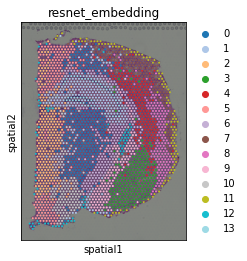

In [5]:
sc.pl.spatial(adata, color="resnet_embedding", palette="tab20")

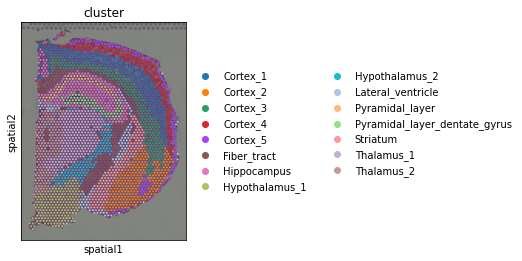

In [6]:
sc.pl.spatial(adata, color="cluster")

In [13]:
def freq_cluster(adata, clust):
    
    df = adata.obs.copy()
    dic = {}
    for c in df[clust[0]].unique():
        tot_values = df[df[clust[0]] == c].shape[0]
        prop = (
            df[df[clust[0]] == c]
            [clust[1]].value_counts()
            .apply(lambda x: x / tot_values)
        )
        dic[c] = prop
    df_final = pd.DataFrame(dic).round(2).replace(np.nan, 0)
    col_cluster = adata.uns["cluster_colors"]
    col_resnet = adata.uns["resnet_embedding_colors"]
#     colors_basel = supclass_df[f"{phenotype_class}_colour"].unique()
    #     df_clust = df_clust[supclass_df[phenotype_class]]

    ax = sns.clustermap(
        df_final,
        annot=True,
        cmap="inferno",
        row_cluster=True,
        method="centroid",
        dendrogram_ratio=(.05, .05),
        figsize=(8, 10),
        col_colors=col_cluster,
        row_colors=col_resnet,
        #     row_colors=adata.uns["leiden_colors"],
    )
    sns.set(font_scale=1.2)
    ax.ax_cbar.set_position((1., .1, .03, .2))
    ax.ax_heatmap.set_xlabel(f"{clust[0]} original")
    ax.ax_heatmap.set_ylabel(f"{clust[1]} clusters")

    return

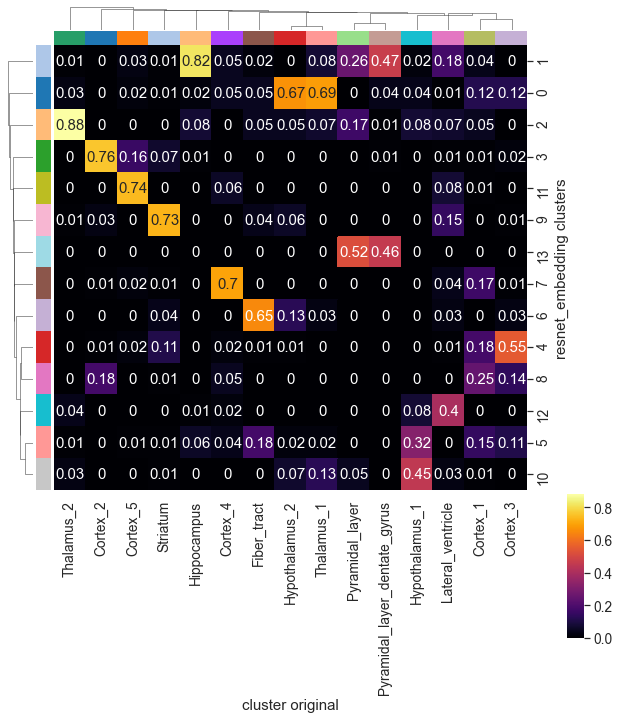

In [14]:
freq_cluster(adata, ["cluster","resnet_embedding"])